In [1]:
import os
import numpy as np
import pandas as pd
import h5py
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


Using TensorFlow backend.


In [2]:
bg_files = ['/afs/cern.ch/user/f/fsiroky/public/JetHC_Cbackground.h5', '/afs/cern.ch/user/f/fsiroky/public/JetHC_D_background.h5','/afs/cern.ch/user/f/fsiroky/public/JetHC_E_background.h5','/afs/cern.ch/user/f/fsiroky/public/JetHC_F_background.h5','/afs/cern.ch/user/f/fsiroky/public/JetHC_G_background.h5','/afs/cern.ch/user/f/fsiroky/public/JetHC_H_background.h5']
bg_jets = ["jet_C_background", "jet_D_background","jet_E_background","jet_F_background","jet_G_background","jet_H_background"]
sig_files = ['/afs/cern.ch/user/f/fsiroky/public/JetHC_Csignal.h5', '/afs/cern.ch/user/f/fsiroky/public/JetHC_D_signal.h5', '/afs/cern.ch/user/f/fsiroky/public/JetHC_E_signal.h5', '/afs/cern.ch/user/f/fsiroky/public/JetHC_F_signal.h5', '/afs/cern.ch/user/f/fsiroky/public/JetHC_G_signal.h5', '/afs/cern.ch/user/f/fsiroky/public/JetHC_H_signal.h5']
sig_jets = ["jet_C_signal", "jet_D_signal", "jet_E_signal", "jet_F_signal", "jet_G_signal", "jet_H_signal"]

def get_jets(bg_files, bg_jets, sig_files, sig_jets, ratio=1.0):
    good_jets=np.empty([0,2802])
    bad_jets=np.empty([0,2802])
    np.random.seed(24)
    for i in range(len(bg_files)):
        bg_jetfile = h5py.File(bg_files[i],'r')
        bg_jet = bg_jetfile[bg_jets[i]][:]
        sig_jetfile = h5py.File(sig_files[i],'r')
        sig_jet = sig_jetfile[sig_jets[i]][:]

        bad_jets = np.concatenate((bad_jets, bg_jet), axis=0)

        ratio=ratio*len(bg_jet)/len(sig_jet)

        mask = np.random.rand(len(sig_jet))<ratio
        good_jets = np.concatenate((good_jets, sig_jet[mask]), axis=0)
        #change the way of saving good_jets if we want to normalize C,D,... specifically

        print(np.sum(mask), len(bg_jet))
        
    return good_jets, bad_jets

def get_train_test_split(good_jets, bad_jets):
    x_train = np.concatenate((good_jets,bad_jets), axis=0)
    y_train = np.zeros(len(x_train))
    y_train[0:len(good_jets)]=1
    mask = shuffle((np.arange(len(x_train))), random_state=42)

    x_train = x_train[mask]
    y_train = y_train[mask]

    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=42)
    return x_train, x_test, y_train, y_test

In [5]:
%%time
scores = []
for ratio in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2.0,2.5,3.0]:
    good_jets, bad_jets = get_jets(bg_files, bg_jets, sig_files, sig_jets, ratio=ratio)
    x_train, x_test, y_train, y_test = get_train_test_split(good_jets, bad_jets)
    model = Sequential()
    model.add(Dense(1000, input_dim=2802, activation='relu'))
#     model.add(Dropout(0.1))
    model.add(Dense(500, activation='relu'))
#     model.add(Dropout(0.1))
    model.add(Dense(1, activation='softmax'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.fit(x_train, y_train,
              epochs=2,
              batch_size=32)
    score = model.evaluate(x_test, y_test, batch_size=32)
    scores.append(score)

978 459
7 97
Epoch 1/2
1309/1309 [==============================] - 2s - loss: 5.7363 - acc: 0.6402     
Epoch 2/2
224/232 [===========================>..] - ETA: 0sCPU times: user 6.91 s, sys: 2.63 s, total: 9.54 s
Wall time: 21.9 s


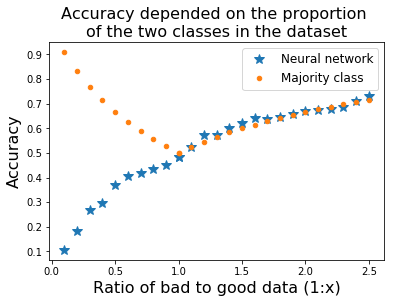

In [8]:
# # acc = [e[1] for e in scores]
# acc = [0.10622710622710622, 0.18166666646798452, 0.26687116564417179, 0.2978723404255319, 0.36807387847070017, 0.40846824412179616, 0.42007001175554937, 0.43550165400089741, 0.45245559044890765, 0.48258706503246557, 0.52611585981712272, 0.57259528119853964, 0.57317073149963538, 0.48258706503246557, 0.6235955056179775, 0.64015444033854718, 0.6361607142857143, 0.64604316529610173, 0.65763888888888888, 0.66980497650276039, 0.67360208062418725, 0.67909033507089867, 0.68834355806280501, 0.70985074644658108, 0.73112659670334657,0.60066833775941786]
# ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,1.4]
# plt.plot(ratios, acc, '*')


# acc = [e[1] for e in scores]
acc = [0.10622710622710622, 0.18166666646798452, 0.26687116564417179, 0.2978723404255319, 0.36807387847070017, 0.40846824412179616, 0.42007001175554937, 0.43550165400089741, 0.45245559044890765, 0.48258706503246557, 0.52611585981712272, 0.57259528119853964, 0.57317073149963538, 0.48258706503246557, 0.6235955056179775, 0.64015444033854718, 0.6361607142857143, 0.64604316529610173, 0.65763888888888888, 0.66980497650276039, 0.67360208062418725, 0.67909033507089867, 0.68834355806280501, 0.70985074644658108, 0.73112659670334657,0.60066833775941786]
ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,1.4]
majority = []
for i in range(len(ratios)):
    denom = 1+ratios[i]
#     print(1/denom,ratios[i]/denom)
    tmp = np.max([1/denom, ratios[i]/denom])
    majority.append(tmp)
plt.plot(ratios, acc, '*', markersize=11, label="Neural network")
plt.plot(ratios, majority, '.', markersize=9, label="Majority class")
plt.ylabel('Accuracy', size=16)
plt.xlabel('Ratio of bad to good data (1:x)', size=16)
plt.title('Accuracy depended on the proportion \n of the two classes in the dataset',fontsize=16)
plt.legend(loc="upper right",fontsize=12)

In [138]:
def normalize(h):
    return h / np.sum(h)

def bhattacharyya(h1, h2):
  '''Calculates the Byattacharyya distance of two histograms.'''

  return 1 - np.sum(np.sqrt(np.multiply(normalize(h1), normalize(h2))))

In [139]:
def plot_variables(sigVals, backVals, var_list, save_figs_path=None, var_range_to_plot=None):
    if var_range_to_plot is None:
        var_range_to_plot = range(len(var_list))
    
    labels = []
    for i in range(len(var_list)):
            for suffix in ['Mean','RMS','Q1','Q2','Q3','Q4','Q5']:
                labels.append(var_list[i]+'_'+suffix)
    
    for var_id in var_range_to_plot: 
        print(var_list[var_id])
        fig = plt.figure(figsize=(15, 7))
        for i in range(7):
            plt.subplot(2, 4, i + 1)    
            index = var_id*7+i
            minimum = np.min( [np.min(backVals[:,index]), np.min(sigVals[:,index])] )
            maximum = np.max( [np.max(backVals[:,index]), np.max(sigVals[:,index])] )
#             back_dist = plt.hist(backVals[:,index], 100, range=(minimum,maximum), facecolor='red', alpha=0.5, label="background", normed = True)
#             sig_dist = plt.hist(sigVals[:,index], 100, range=(minimum,maximum), facecolor='blue', alpha=0.5, label="normal", normed = True)
            back_dist = plt.hist(backVals[:,index], 100, range=(minimum,maximum), facecolor='red', alpha=0.5, label="background", normed = False)
            sig_dist = plt.hist(sigVals[:,index], 100, range=(minimum,maximum), facecolor='blue', alpha=0.5, label="normal", normed = False)

            bhat = bhattacharyya(back_dist[0], sig_dist[0])
           
            plt.plot([],[], '.', label="Bhatta {:.4f}".format(bhat))

            plt.legend(loc="upper right")
            plt.title(labels[index],fontsize=16)

        ax = plt.subplot(2,4,8)
        plt.plot([0,1],[0,1],'.')
        plt.text(0, 0.9, 'number of events', fontsize=15)
        plt.text(0, 0.7, 'background '+str(backVals.shape[0]), fontsize=15)
        plt.text(0, 0.5, 'normal '+str(sigVals.shape[0]), fontsize=15)
        plt.setp(ax.get_xticklabels(),visible=False)
        plt.setp(ax.get_yticklabels(),visible=False)

        plt.tight_layout()
        # setting the global title and pushing the subplots down accordingly 
        st = fig.suptitle(var_list[var_id], fontsize=25)
        st.set_y(0.95)
        fig.subplots_adjust(top=0.85)
        
        if save_figs_path is not None:
            plt.savefig(save_figs_path+'/'+var_list[var_id]+'.png', dpi=fig.dpi)
    print('done plot_variables')

qPFJet8CHS5Pt
qPFJetEI1Pt
done plot_variables


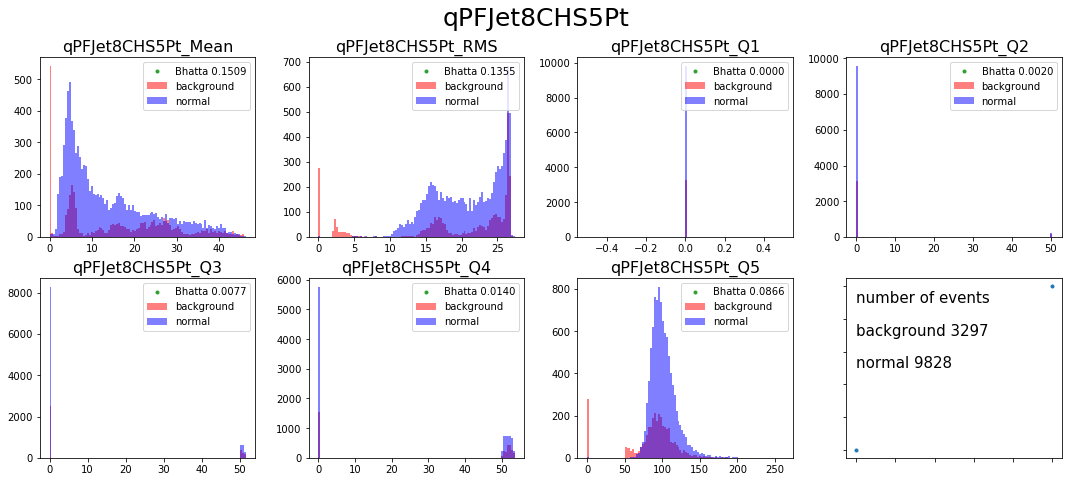

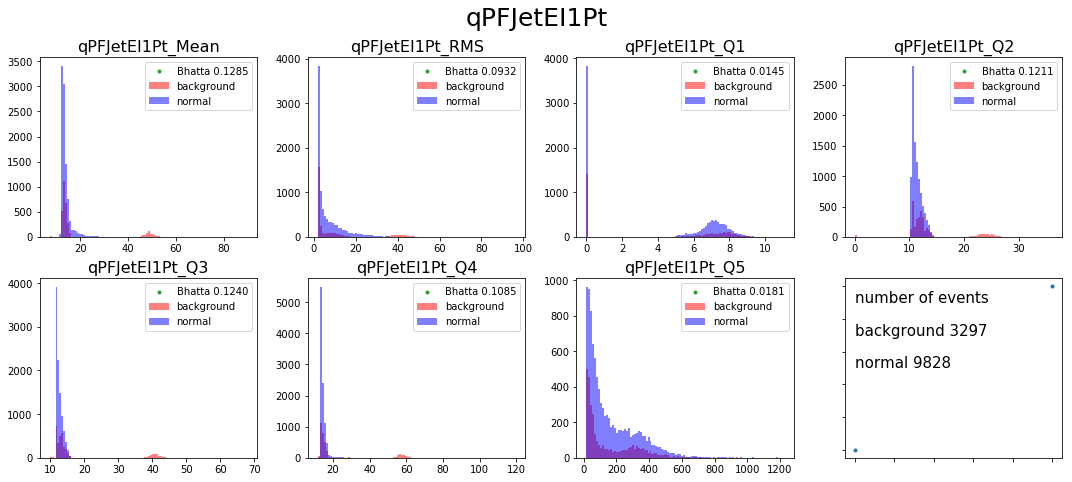

In [141]:

plot_variables(good_jets, bad_jets, var_names_reduced5, var_range_to_plot=[44,58])